# Angular 101
- สร้างกราฟรายงานพลัง five force model

เอกสารประกอบ
1.https://www.investopedia.com/terms/p/porter.asp

# five force ที่มีผลต่อเรา

In [1]:
import pandas as pd

In [5]:
ffList  = ['RR','NE','BC','SP','ST']

In [10]:
df = pd.read_csv('services/comment.csv')
df = df[(df['subject'].str.contains('ADVANC')) & (~df['levelFF'].isnull())]
df

Unnamed: 0            hasdid     subject  \
33          34  1646486097002893  Re: ADVANC   
34          35  1646491830698240  Re: ADVANC   
35          36  1646570600200975  Re: ADVANC   
36          37  1646570749438427  Re: ADVANC   
37          38  1646570823229385  Re: ADVANC   

                                              content  \
33  คู่น้อยราย แต่ก็มีความเสี่ยงหากมีการแข่งขันด้า...   
34              ดาวเทียม starlink อาจจะเข้ามาทดแทนได้   
35  ลูกค้าก็มีสิทธิย้ายค่ายได้ แต่ก็มีให้เลือกไม่ม...   
36  ADVANC เรามีฐานลูกค้าเยอะ การสั่งซื้ออุปกรณ์ต่...   
37  ธุรกิจจำเป็นต้องมีบัตรอนุญาตในการประกอบกิจการ ...   

                     postdate                 postupdate fileimg modelValue  \
33  2022-03-05 20:14:56+07:00  2022-03-05 20:14:56+07:00     NaN         RR   
34  2022-03-05 21:50:30+07:00  2022-03-05 21:50:30+07:00     NaN         ST   
35  2022-03-06 19:43:20+07:00  2022-03-06 19:43:20+07:00     NaN         BC   
36  2022-03-06 19:45:49+07:00  2022-03-06 19:45:49+07:00     NaN         SP   
37  2022-03-06 19:47:03+07:00  2022-03-06 19:47:03+07:00     NaN         NE   

    levelFF  
33      6.0  
34      7.0  
35      3.0  
36      3.0  
37      3.0

In [13]:
df = df.groupby('modelValue')[['levelFF']].mean()
df

levelFF
modelValue         
BC              3.0
NE              3.0
RR              6.0
SP              3.0
ST              7.0

In [61]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

%config InlineBackend.figure_format ='retina'

import mplcyberpunk
plt.style.use('cyberpunk')

In [62]:
subjects = list(df.index)
subjects

['BC', 'NE', 'RR', 'SP', 'ST']

In [63]:
new_subject = []
for i in subjects:
  if(i=='BC'):
    new_subject.append('Power of customers')
  elif(i=='NE'):
    new_subject.append('Potential of new entrants into the industry')
  elif(i=='RR'):
    new_subject.append('Competition in the industry')
  elif(i=='SP'):
    new_subject.append('Power of suppliers') 
  elif(i=='ST'):
    new_subject.append('Threat of substitute products')
    
subjects = new_subject

In [64]:
level = list(df['levelFF'])
level

[3.0, 3.0, 6.0, 3.0, 7.0]

In [65]:
angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

In [66]:
subjects.append(subjects[0])
level.append(level[0])

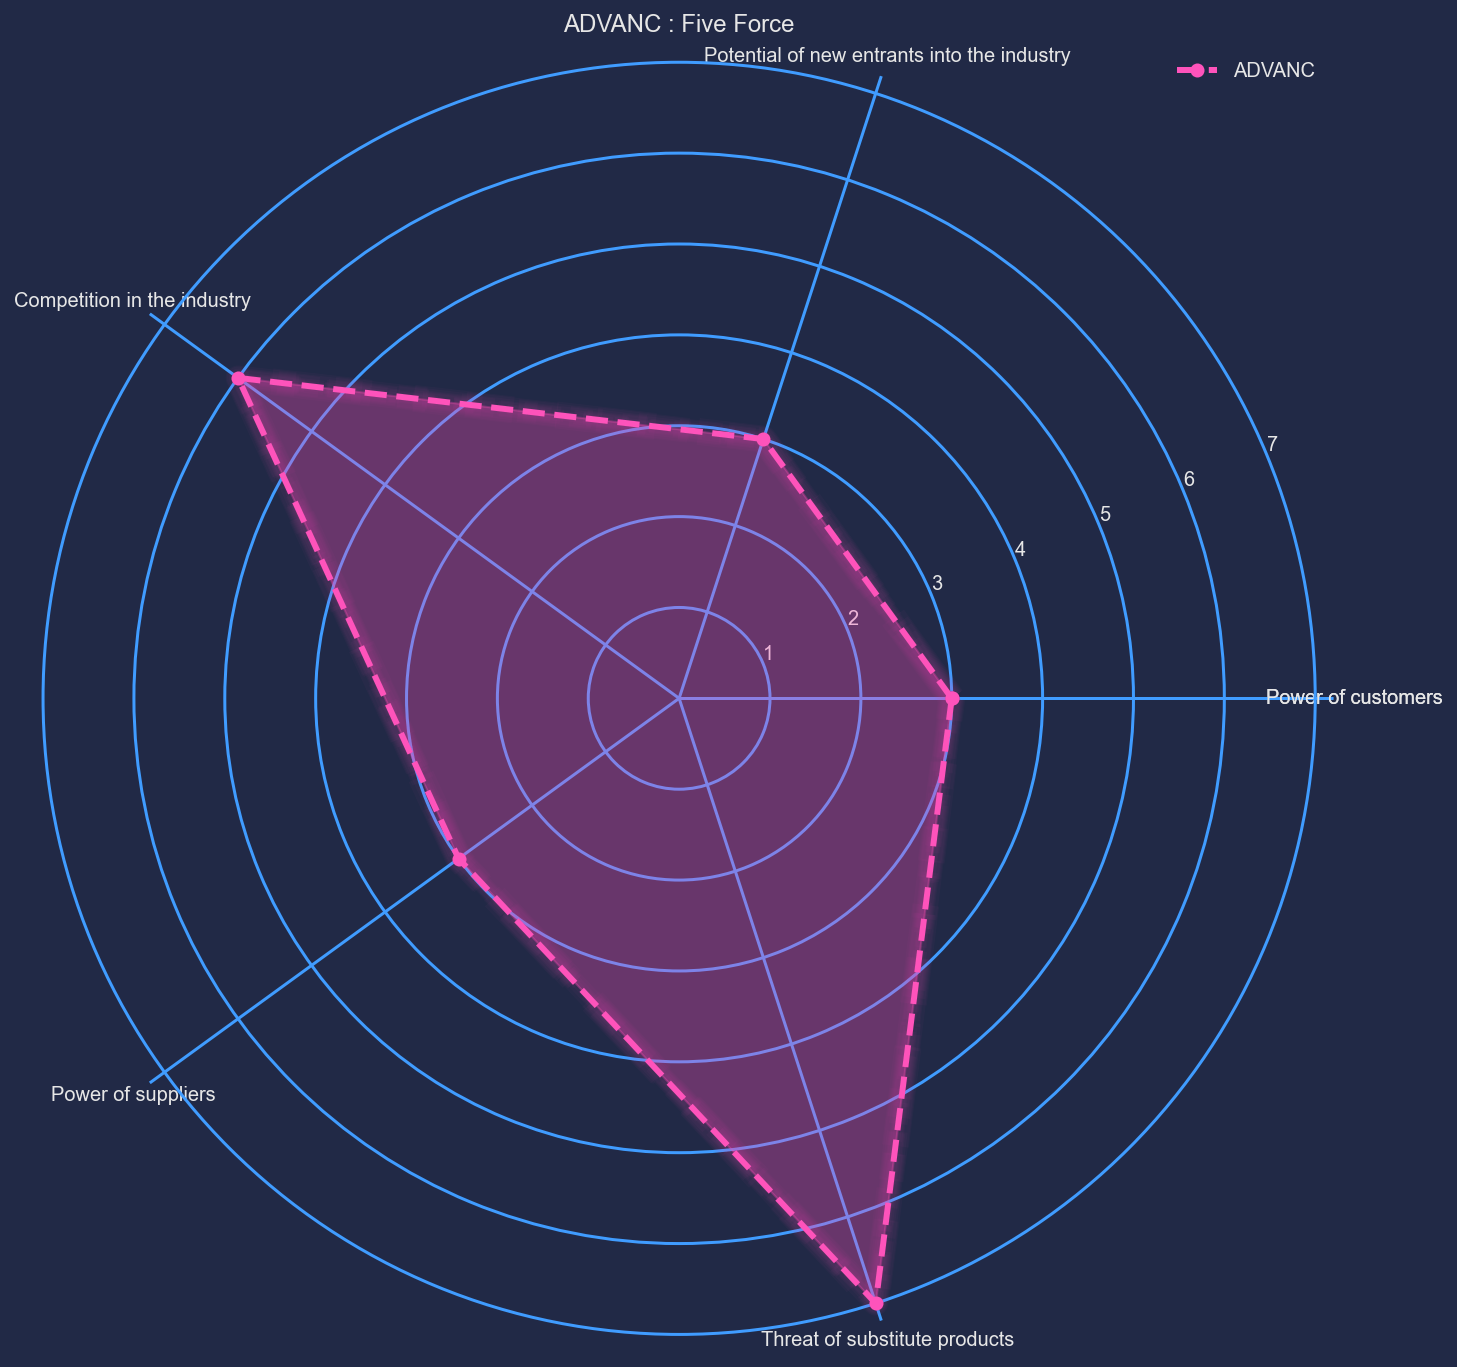

In [86]:
#plt.style.use("dark_background")
plt.style.use("cyberpunk")

symbol = 'ADVANC'

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)
ax.grid(linewidth=1.5,color = '#409CFF')
#level Plot
ax.plot(angles,level, 'o--', color='#FE53BB', linewidth=3, label=symbol)
ax.fill(angles, level, alpha=0.25, color='#FE53BB')
 
ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.tight_layout()

plt.legend()

#https://github.com/dhaitz/mplcyberpunk
mplcyberpunk.add_glow_effects()

plt.title('ADVANC : Five Force')
fig.set_size_inches(12, 12)
plt.savefig(symbol+'.png', dpi=100)
plt.show()

# รวมทุกอย่างเข้าด้วยกัน

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#plt.style.use('ggplot')

#%config InlineBackend.figure_format ='retina'

import mplcyberpunk

def genFiveForce(symbol):
   plt.style.use('cyberpunk')
   ffList  = ['RR','NE','BC','SP','ST']
   df = pd.read_csv('services/comment.csv')
   df = df[(df['subject'].str.contains(symbol)) & (~df['levelFF'].isnull())]
  
   df = df.groupby('modelValue')[['levelFF']].mean()
    
   subjects = list(df.index)
   level = list(df['levelFF'])
    
   angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
   angles=np.concatenate((angles,[angles[0]]))
    
   subjects.append(subjects[0])
   level.append(level[0])
   
   #plt.style.use("dark_background")
   plt.style.use("cyberpunk")

 

   fig=plt.figure(figsize=(6,6))
   ax=fig.add_subplot(111, polar=True)
   ax.grid(linewidth=1.5,color = '#409CFF')
   #level Plot
   ax.plot(angles,level, 'o--', color='#FE53BB', linewidth=3, label=symbol)
   ax.fill(angles, level, alpha=0.25, color='#FE53BB')
 
   ax.set_thetagrids(angles * 180/np.pi, subjects)
   plt.grid(True)
   plt.tight_layout()
   plt.legend()

   #https://github.com/dhaitz/mplcyberpunk
   mplcyberpunk.add_glow_effects()

   plt.title(symbol+' : Five Force')
   fig.set_size_inches(12, 12)
   plt.savefig(symbol+'.png', dpi=100)
   #plt.show()


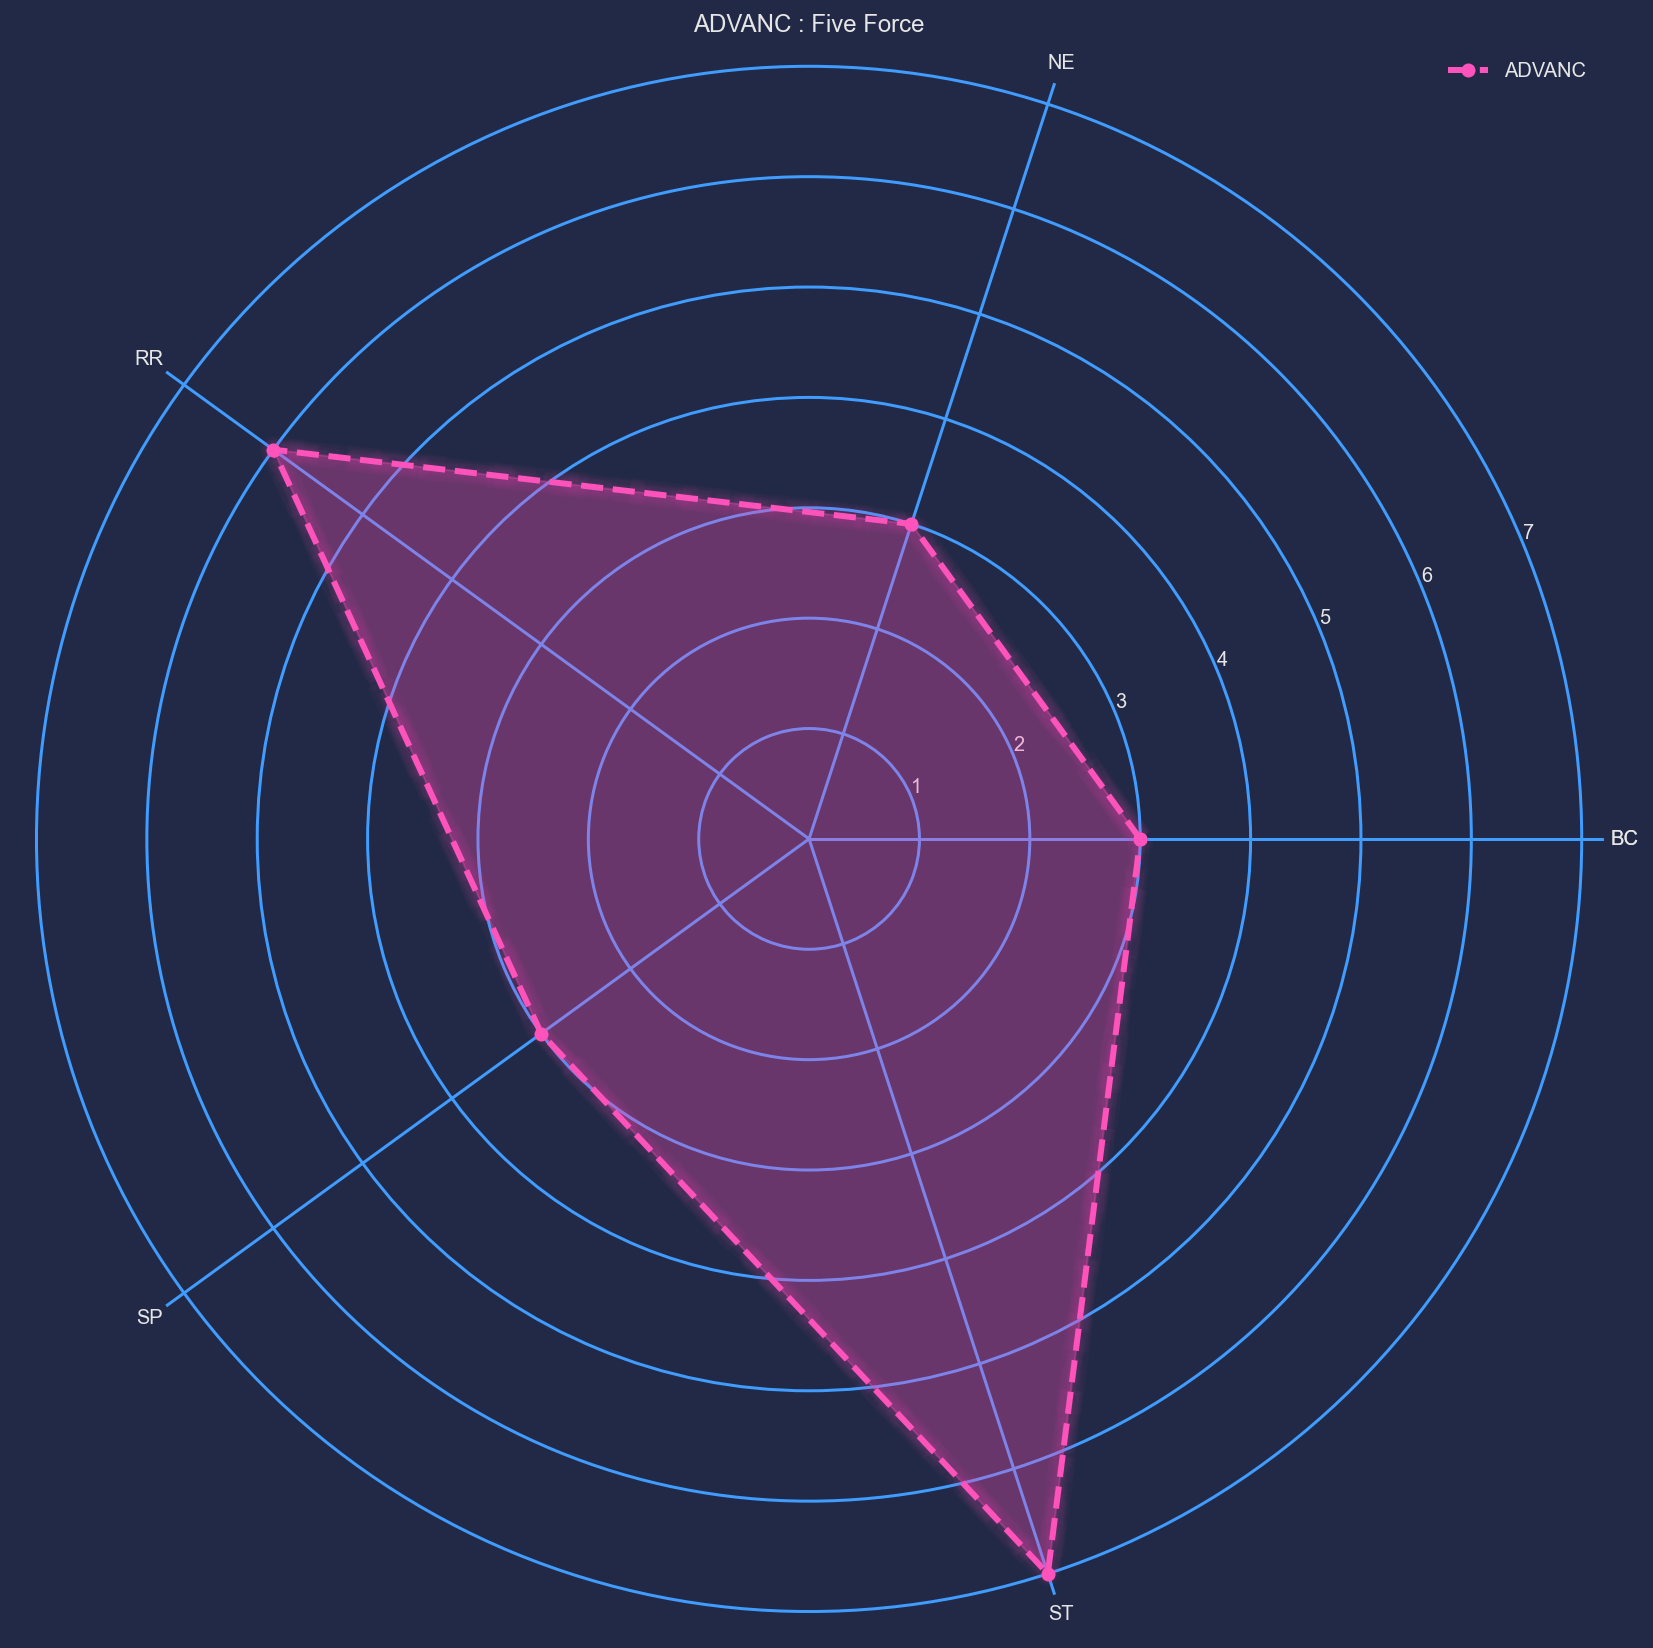

In [88]:
genFiveForce('ADVANC')